# **Supuestos de una regresión lineal simple**

### **La Regresión Lineal Simple** es una técnica estadística utilizada para modelar la relación entre una variable dependiente $y$ y y una variable independiente $x$. Para que los resultados de una regresión lineal simple sean válidos e interpretable, es importante que se cumplan ciertos supuestos fundamentales. Estos supuestos permiten garantizar la precisión, la eficiencia y la validez de los estimadores obtenidos por el método de **Mínimos Cuadrados Ordinarios** (OLS, por sus siglas en inglés).

## ¿Y cuáles son esos supuestos?

### **1. Relación lineal:**

### Existe una relación lineal entre la variable explicada ($y$) y la variable explicativa ($x$), por lo que se puede representar como una linea recta:

$$
\LARGE
\hat{y} = \beta_0 + \beta_1{x} + \epsilon
$$

### **2. Homocedasticidad**

### La varianza de los residuos ($\epsilon$) es constante para cualquier valor de $x$:

$$
\LARGE
\text{Var}(\epsilon_i) = {\sigma}^2 \quad {\forall}i
$$

### **3. Normalidad de los residuos ($\epsilon$):**

### Los residuos deben seguir una distribucion normal:

$$
\LARGE
\epsilon \sim {N(0, {\sigma}^2)}
$$

### **4. Independencia de los residuos ($\epsilon$):**

### Los errores deben ser independientes entre sí. Esto implica que el valor de un error no está relacionado con el de otro:

$$
\LARGE
\text{Cov}(\epsilon_i, \epsilon_j) = 0 \quad \forall i \neq j
$$


### Además, los residuales o residuos de un modelo de regresión es la diferencia entre valor observado de la variable explicada menos el valor estimado, formalmente:

$$
\LARGE
\epsilon = y - \hat{y}
$$

## **Datos**

### En ésta ocasión usaremos la mítica base de datos **Iris**. En concreto haremos una regresión lineal simple (de un solo regresor) y veremos si el modelo cumple o no con los supuestos.

## Librerias y análisis exploratorio de los datos

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro


In [210]:
# Cargamos los datos y establecemos "Id" como index
data = pd.read_csv("C:\\Users\\kike\\Documents\\SPSS\\datasets_Iris_model.csv")
data.set_index(keys= "Id", inplace= True)

# Vemos de cerca los datos)
print(f"Hay valores faltantes:\n {"="*30} \n {data.isnull().sum()}")
print(f" {"=" * 30} \n Valor únicos: {data["Species"].unique()}")
data.head()

Hay valores faltantes:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
 Valor únicos: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


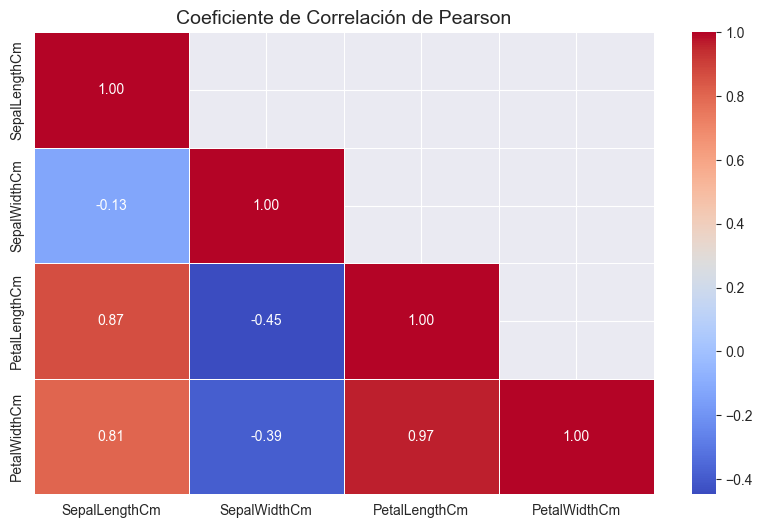

In [180]:
sns.set_style("darkgrid")

# Creamos la matriz de correlación
corr = data.iloc[:, :-1].corr(method='pearson')

# Para la estética 
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Creamos un plot
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Coeficiente de Correlación de Pearson", fontsize=14)

heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 10},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='coolwarm',
                      ax=ax,
                      mask= mask)

plt.show()

### En este caso, sería interesante hacer una regresión entre Sepal Length y Petal Length, tomando la primera como variable regresora:

In [217]:
x = sm.add_constant(data["SepalLengthCm"])
model = sm.OLS(endog = data["PetalLengthCm"], # Varible explicada
                exog= x).fit() # Variable explicativa
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PetalLengthCm   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     354.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           2.36e-37
Time:                        10:46:35   Log-Likelihood:                -156.58
No. Observations:                 120   AIC:                             317.2
Df Residuals:                     118   BIC:                             322.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.0177      0.580    -12.097      0.000      -8.166      -5.869
SepalLengthCm     1.8359      0.097     18.831      0.000       1.643       2.029
==============================================================================
Omnibus:                        0.060   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.206
Skew:                          -0.024   Prob(JB):                        0.902
Kurtosis:                       2.803   Cond. No.                         43.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

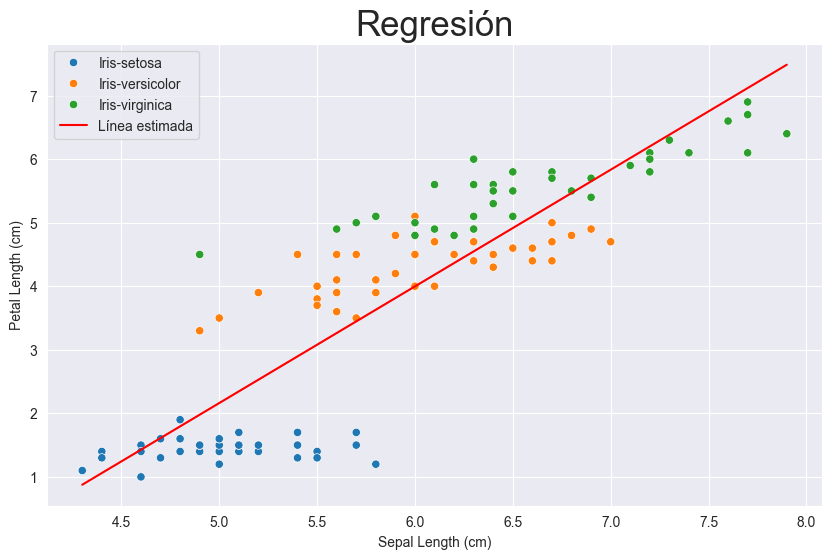

In [212]:
data['Y estimada'] = model.predict(x)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="SepalLengthCm",
                 y="PetalLengthCm",
                   hue="Species")
sns.lineplot(x=data["SepalLengthCm"],
              y=data['Y estimada'],
                color='red',
                  label='Línea estimada')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Regresión', fontsize = 25)
plt.legend()
plt.show()

## **Linealidad**

### Existen diversas formas de verificar la linealidad en una regresión lineal, siendo los diagramas de dispersión uno de los métodos más simples y utilizados. Un diagrama de dispersión muestra gráficamente la relación entre dos variables, donde cada punto representa una observación. Para evaluar la linealidad, se grafica la variable dependiente en función de cada variable independiente, buscando un patrón claro y consistente. Lo ideal es observar una distribución que forme una línea recta o una nube de puntos simétrica alrededor de una línea recta. Si se detecta un patrón curvado, ondulado o una distribución desigual de los puntos, esto podría indicar la presencia de una relación no lineal.

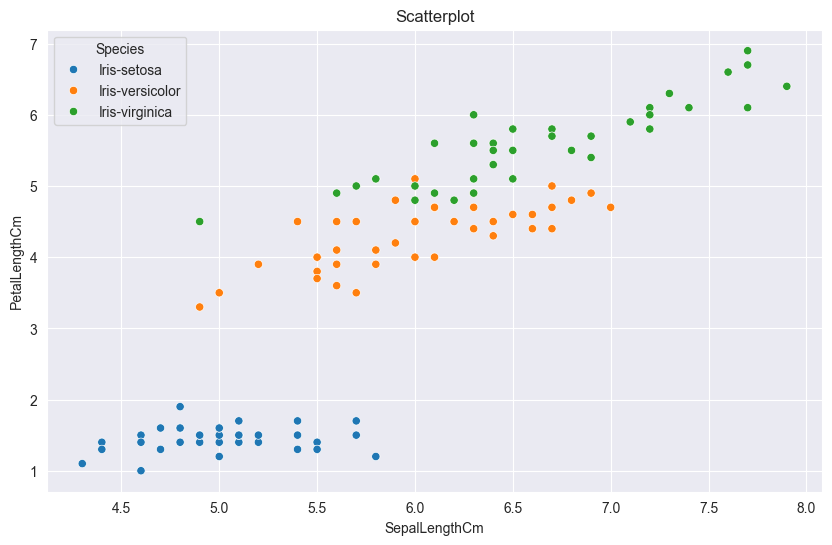

In [181]:
# Creamos un scatterplot
sns.scatterplot(data=data,
                 x="SepalLengthCm",
                   y="PetalLengthCm",
                     hue="Species") # con esto separamos por grupos
plt.title()
plt.gcf().set_size_inches(10,6)
plt.show()

## **Heterocedasticidad**

### La prueba de **Breusch-Pagan** es un método estadístico utilizado para detectar la presencia de heterocedasticidad en un modelo de regresión lineal.

### Pasos:

* ### Obtener los residuos:

$$
\LARGE
{\hat\epsilon_i}^2 = (y_i - \hat{y_i}^2)
$$

* ### Ajustar un modelo auxiliar: Regresar los residuos al cuadrado (${\hat\epsilon_i}^2$) sobre las variables independientes ($x_i$):

$$
\LARGE
{\hat\epsilon_i}^2 = \gamma_0 + \gamma_1{x_1} + \gamma_1{x_1} + \, \cdot\cdot\cdot\, + \gamma_k{x_k} + u_i
$$

* ### Calcular el estadístico de prueba: El estadístico de Breusch-Pagan está dado por:

$$
\LARGE
\text{LM} = \frac{n}{2}\cdot{R^2}
$$

### Dónde:
* ### $n$: Número de observaciones.
* ### $R^2$:Coeficiente de determinación de la regresión auxiliar.

* ### Contrastar el estadístico $\text{LM}$ sigue una distribucion ${\chi_k}^2$ con k grados de libertad (donde $k$ es el número de variables independientes).

### **Hipótesis**:

* ### Hipótesis nula ($H0$): La varianza de los errores es constante (homocedasticidad).
* ### Hipótesis alternativa ($H1$): La varianza de los errores no es constante (heterocedasticidad).

### **Regla de decisión**:

* ### Si $\text{LM}$ > $\chi_{k,\alpha}^2$ (valor crítico de la distribución para un nivel de significancia $\alpha$) se rechaza $H_0$ y se concluye que hay heterocedasticidad.

* ### $LM\leq \chi^2_{k,\alpha}$, no se rechaza $H_0$, indicando homocedasticidad.


In [214]:
breusch_pagan = het_breuschpagan(model.resid
                                 ,model.model.exog)

items_breusch_pagan = ['Multiplicador de Lagrange', 'P-value',
        'F-estadístico', 'F P-value']

print("Resultados Breusch Pagan")
print("-" *35)
for item, stat in zip(items_breusch_pagan, breusch_pagan):
    print(f"{item}: {stat:.3f}")

print("-" *35)
print("Decisión")
print("-" *35)
if breusch_pagan[1] > 0.5:
        print("Hay presencia de Heterocedasticidad")
else:
        print("No hay Heterocedasticidad")    



Resultados Breusch Pagan
-----------------------------------
Multiplicador de Lagrange: 3.751
P-value: 0.053
F-estadístico: 3.807
F P-value: 0.053
-----------------------------------
Decisión
-----------------------------------
No hay Heterocedasticidad


## **Normalidad de los residuos**

### El test de **Shapiro-Wilk** es una prueba estadística diseñada para evaluar si una muestra de datos proviene de una distribución normal. Es ampliamente utilizado debido a su robustez y sensibilidad en tamaños de muestra pequeños y moderados.

### **Fórmula**:

$$
\LARGE W = \frac{(\sum_{i=1}^n\, a_i{x_{(i)}})^2}{\sum_{i=1}^n{(x_i - \overline{x})^2}}
$$

### Dónde:

* ### $x_{(i)}$: Valores de la muestra ordenados ascendentemente.
* ### $\overline{x}$: Media muestral.
* ### $a_i$: Coeficientes calculados a partir de los valores esperados de una distribución normal estándar y su matriz de covarianza.

### Una vez hecho la operación $W$ está acotada entre 0 y 1, de donde se deduce que si es cercano a la unidad (1), los datos son consistentes con una distribución normal. Caso contrario, se presupone que no vienen de una distribución normal.

### **Hipótesis**:

* ### Hipótesis nula ($H0$): Sigue una distribución normal.
* ### Hipótesis alternativa ($H1$): No sigue una distribución normal.


### **QQ Plot**

### Adicionalmente tenemos una  "prueba" gráfica para determinar si hay normalidad de los residuos: el **QQ Plot**. En la gráfica se compara los datos contra una distribución normal, los puntos deben formar una línea recta. Cualquier desviación sugiere que los datos no son perfectamente normales.

Resultados Shapiro-Wilk
-----------------------------------
Estadístico de prueba: 0.995
P-value: 0.958
-----------------------------------
Decisión
-----------------------------------
Los residuos siguen una distribución normal


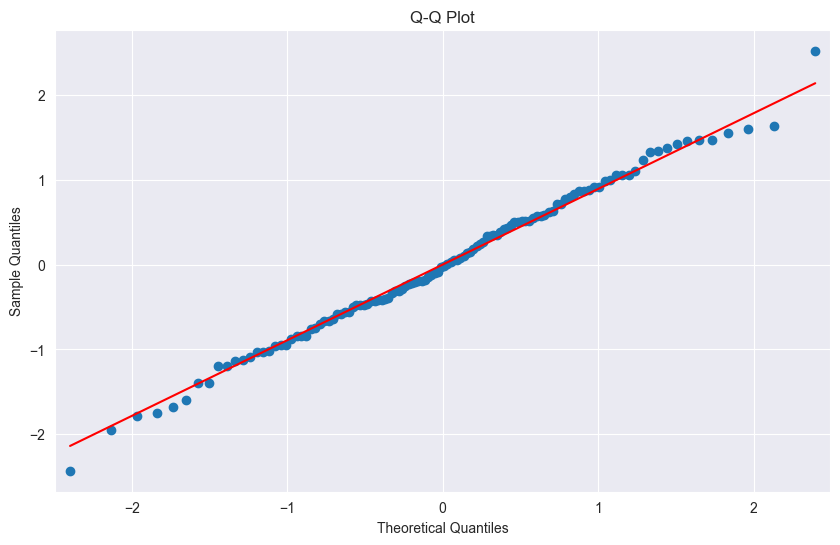

In [213]:
items_shapiro_wilk = ["Estadístico de prueba", "P-value"]

print("Resultados Shapiro-Wilk")
print("-" *35)
shapiro_test = shapiro(model.resid)

for item, stat in zip(items_shapiro_wilk, shapiro_test):
        print(f"{item}: {stat:.3f}")

print("-" *35)
print("Decisión")
print("-" *35)

if shapiro_test[1] > 0.5:
        print("Los residuos siguen una distribución normal")
else:
        print("Los residuos no siguen una distribución normal")    


sm.qqplot(model.resid, line = "s")
plt.title( "Q-Q Plot")
plt.gcf().set_size_inches(10, 6)
plt.show()

## **Independencia de los residuos**

### El **Durbin-Watson** ($DW$) es una estadística que se utiliza para detectar la autocorrelación de los residuos en un modelo de regresión lineal, especialmente de primer orden (es decir, si un residuo está correlacionado con el residuo inmediatamente anterior). La autocorrelación puede violar los supuestos básicos de una regresión lineal, afectando la validez de los resultados.

### **Fórmula:**

$$
\LARGE
DW = \frac {\sum_{t=2}^n(\epsilon_t - \epsilon_{t-1})^2} {\sum_{t=1}^n{{\epsilon^2}_t}}
$$

### Dónde:

* ### $\epsilon_t$: Residuo en el tiempo $t$
* ### $\epsilon_{t-1}$: Residuo en el tiempo $t-1$, es decir, el residuo anterior.
* ### $n$: Número total de observaciones.

### **Interpretación**:

* ### Si $DW \approx 2$, el modelo no presenta problemas de autocorrelación.
* ### Valores cercanos a $0$ indican una fuerte autocorrelación positiva.
* ### Valores cercanos a $4$ indican una fuerte autocorrelación negativa.


In [203]:
durbin_watson_stat = durbin_watson(model.resid, # Ponemos los residuos
                                   axis = 0) # 0 por que solo tenemos una x

print(f"El estadístico de Durbin-Watson es: {durbin_watson_stat:.3f}")


# En este caso haremos una prueba lógica, cuya valoración será, en cierto modo
# subjetiva
if 1.5 < durbin_watson_stat <2.5:
    print("No hay autocorrelación")
elif durbin_watson_stat < 1.5:
    print("Hay una posible autocorrelación positiva")
elif durbin_watson_stat > 2.5:
    print("Hay una posible correlación negativa")

El estadístico de Durbin-Watson es: 1.211
Hay una posible autocorrelación positiva


## **Referencias**

* ### Breusch, T. S.; Pagan, A. R. (1979). “A Simple Test for Heteroskedasticity and Random Coefficient Variation”. Econometrica. 47 (5): 1287–1294.
* ### Durbin, J., & Watson, G. S. (1950). Testing for Serial Correlation in Least Squares Regression: I. Biometrika, 37(3/4), 409–428. https://doi.org/10.2307/2332391
* ### Shapiro, S. S. & Wilk, M.B, “An analysis of variance test for normality (complete samples)”, Biometrika, 1965, Vol. 52, pp. 591-611, DOI:10.2307/2333709
* ### Wooldridge, Jeffrey M., 1960-. (2012). Introductory econometrics : a modern approach. Mason, Ohio :South-Western Cengage Learning,